# Random Walks With Reinforcement

**M 375T Experimental Mathematics Final Project**

**Carrie Liang (sl54435)**

#### not useful

In [31]:
class RandomWalk:
    
    def __init__(self):
        self.trajectory = [0]
        self.directions = np.array([-1,1])
        self.l = 1
        self.r = 1
        self.total = 2
        self.curr = 0
        self.probabilities = np.array([1/2, 1/2])
    

    def generate_trajectory(self, num_steps):

        self.__init__()

        for i in range(num_steps):
            step = np.random.choice(self.directions, p=self.probabilities).item()
            if step == -1:
                self.l += 1
            elif step == 1:
                self.r += 1
            self.total += 1

            # add step to trajectory
            self.curr += step
            self.trajectory.append(self.curr)

            # update probabilities
            self.probabilities[0] = self.l/self.total
            self.probabilities[1] = self.r/self.total
        
    def get_trajectory(self):

        return self.trajectory
    
    def plot_trajectory(self):
        
        x_values = list(range(len(self.trajectory)))
        y_values = self.trajectory
        
        plt.plot(x_values, y_values)
        plt.title("Sample Trajectory of Random Walk")
        plt.xlabel("Iteration")
        plt.ylabel("Value")

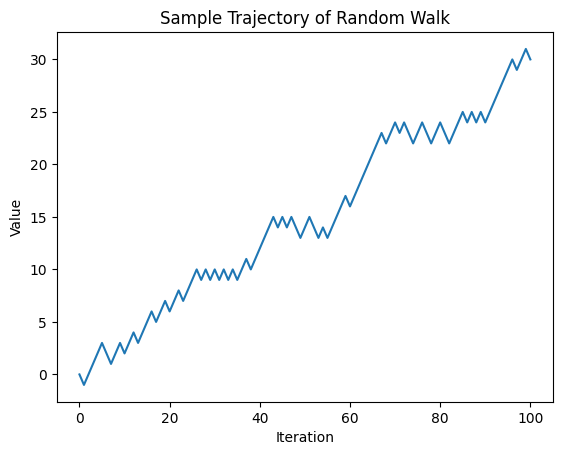

In [32]:
test = RandomWalk()
test.generate_trajectory(100)
test.plot_trajectory()

### Imports

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from randomwalk_functions import *
from collections import Counter

## Preliminary Testing

### 1D Model - Symmetric

How to think of a random walk with reinforcement in 1D?

- trajectory is a list of numbers [0, 1, 2, 1, 0, -1, 0, ...]

To get statistics and stuff we can have big dataframe of like 1 million rows, representing 1 million trajectories, and each column is a step.

In [5]:
positions_list = [Counter()] * 3
positions_list

[Counter(), Counter(), Counter()]

In [2]:
num_iter = 1_000
num_steps = 1_000
positions_list = [Counter()] * (num_steps+1)

for i in range(num_iter):
    trajectory = generate_1d_walk(num_steps)
    for j, pos in enumerate(trajectory):
        positions_list[j][pos] += 1

positions_list


[Counter({0: 26016,
          -1: 25086,
          1: 24954,
          -2: 24214,
          2: 23828,
          -3: 23249,
          3: 22789,
          -4: 22327,
          4: 21711,
          -5: 21380,
          5: 20517,
          -6: 20249,
          6: 19589,
          -7: 19151,
          7: 18695,
          -8: 18528,
          -9: 17984,
          8: 17816,
          -10: 17286,
          9: 16870,
          -11: 16518,
          10: 15964,
          -12: 15502,
          11: 15215,
          12: 14440,
          -13: 14404,
          13: 13503,
          -14: 13479,
          14: 12815,
          -15: 12791,
          -16: 12180,
          15: 12102,
          16: 11414,
          -17: 11357,
          17: 11097,
          18: 10863,
          -18: 10631,
          19: 10610,
          20: 10270,
          -19: 10001,
          21: 9929,
          22: 9615,
          -20: 9509,
          23: 9107,
          -21: 9035,
          24: 8622,
          -22: 8578,
          25: 814

In [4]:
positions_list[0]

Counter({0: 26016,
         -1: 25086,
         1: 24954,
         -2: 24214,
         2: 23828,
         -3: 23249,
         3: 22789,
         -4: 22327,
         4: 21711,
         -5: 21380,
         5: 20517,
         -6: 20249,
         6: 19589,
         -7: 19151,
         7: 18695,
         -8: 18528,
         -9: 17984,
         8: 17816,
         -10: 17286,
         9: 16870,
         -11: 16518,
         10: 15964,
         -12: 15502,
         11: 15215,
         12: 14440,
         -13: 14404,
         13: 13503,
         -14: 13479,
         14: 12815,
         -15: 12791,
         -16: 12180,
         15: 12102,
         16: 11414,
         -17: 11357,
         17: 11097,
         18: 10863,
         -18: 10631,
         19: 10610,
         20: 10270,
         -19: 10001,
         21: 9929,
         22: 9615,
         -20: 9509,
         23: 9107,
         -21: 9035,
         24: 8622,
         -22: 8578,
         25: 8145,
         -23: 8078,
         -24: 7709,
     

In [6]:
def generate_many_walks(num_walks = 1_000, num_steps = 1_000):

    # Dimensions
    # num_walks is the number of rows
    # num_steps+1 is the number of columns

    # Initialize empty numpy array
    data = np.empty((num_walks, num_steps+1))

    for i in range(num_walks):
        data[i] = generate_1d_walk(num_steps)

    # Convert to DataFrame
    columns = [f'X_{i}' for i in range(num_steps+1)]
    df = pd.DataFrame(data, columns=columns)

    return df

In [7]:
hitest = generate_many_walks()

In [8]:
hitest

X_0  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  ...  X_991  X_992  \
0    0.0 -1.0  0.0 -1.0 -2.0 -1.0  0.0  1.0  2.0  1.0  ...   19.0   20.0   
1    0.0 -1.0 -2.0 -3.0 -4.0 -5.0 -4.0 -3.0 -2.0 -1.0  ...  -29.0  -30.0   
2    0.0 -1.0  0.0  1.0  2.0  3.0  4.0  5.0  4.0  3.0  ...   37.0   36.0   
3    0.0 -1.0 -2.0 -3.0 -4.0 -5.0 -4.0 -3.0 -4.0 -5.0  ...  -89.0  -88.0   
4    0.0 -1.0  0.0 -1.0  0.0 -1.0  0.0 -1.0 -2.0 -1.0  ...    3.0    2.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  0.0  1.0  0.0 -1.0  0.0 -1.0 -2.0 -1.0 -2.0 -3.0  ...  -41.0  -42.0   
996  0.0  1.0  0.0 -1.0  0.0 -1.0  0.0 -1.0  0.0 -1.0  ...   11.0   10.0   
997  0.0 -1.0  0.0  1.0  0.0  1.0  2.0  3.0  2.0  1.0  ...   61.0   60.0   
998  0.0  1.0  0.0  1.0  0.0  1.0  2.0  3.0  2.0  1.0  ...   25.0   26.0   
999  0.0 -1.0 -2.0 -1.0 -2.0 -1.0  0.0  1.0  2.0  3.0  ...   25.0   24.0   

     X_993  X_994  X_995  X_996  X_997  X_998  X_999  X_1000  
0     21.0   20.0   21.0   22.0   23.0   24.0   23.0    24.0  
1    -31.0  -32.0  -31.0  -30.0  -29.0  -28.0  -29.0   -30.0  
2     35.0   34.0   33.0   34.0   35.0   36.0   35.0    36.0  
3    -87.0  -88.0  -89.0  -90.0  -91.0  -90.0  -89.0   -88.0  
4      3.0    4.0    5.0    4.0    3.0    2.0    3.0     2.0  
..     ...    ...    ...    ...    ...    ...    ...     ...  
995  -41.0  -40.0  -41.0  -42.0  -43.0  -44.0  -45.0   -44.0  
996    9.0   10.0   11.0   10.0    9.0   10.0    9.0     8.0  
997   61.0   60.0   59.0   58.0   57.0   58.0   57.0    58.0  
998   27.0   26.0   25.0   24.0   23.0   22.0   21.0    22.0  
999   25.0   26.0   27.0   28.0   29.0   28.0   27.0    28.0  

[1000 rows x 1001 columns]

In [8]:

m = 10000  # number of walks
n = 1000   # steps per walk

# Each step is +1 or -1, chosen randomly
steps = np.random.choice([-1, 1], size=(m, n))

# Cumulative sum gives the walk
walks = np.cumsum(steps, axis=1)

In [10]:
walks

array([[ -1,  -2,  -3, ..., -80, -79, -78],
       [ -1,   0,  -1, ...,  18,  19,  18],
       [  1,   2,   1, ...,  22,  23,  24],
       ...,
       [  1,   2,   3, ..., -32, -33, -34],
       [ -1,   0,   1, ...,  38,  39,  40],
       [  1,   0,   1, ...,  -6,  -5,  -6]], shape=(10000, 1000))

In [3]:
import numpy as np

directions = np.array([-1, 1])
probabilities = np.array([1/2, 1/2])

hi = np.random.choice(directions, p=probabilities)

print(1 + hi)

2


In [10]:
def generate_1d_walk_positive(num_steps = 100_000):
    # initialize trajectory and reinforcement factor (transition probabilities)
    trajectory = [0]
    directions = np.array([-1, 1])
    l = 1
    r = 1
    total = 2
    probabilities = np.array([1/2, 1/2])
    curr = 0 

    for i in range(num_steps):
        step = np.random.choice(directions, p=probabilities).item()
        if step == -1:
            l += 1
        elif step == 1:
            r += 1
        total += 1

        # add step to trajectory
        curr += step
        trajectory.append(curr)

        # update probabilities
        probabilities[0] = l/total
        probabilities[1] = r/total
    

    return trajectory

In [11]:
def generate_positive_1d_walk(num_walks, num_steps):
    """
    num_walks is the number of rows
    num_steps + 1 is the number of columns
    """

    # Initialize empty numpy array
    data = np.empty((num_walks, num_steps + 1))

    for i in range(num_walks):
        data[i] = generate_1d_walk_positive(num_steps)

    # Convert to DataFrame
    columns = [f'X_{i}' for i in range(num_steps+1)]
    df = pd.DataFrame(data, columns=columns)

    return df


In [15]:
whatsthis = generate_positive_1d_walk(num_walks=10000,num_steps=1000)
whatsthis

X_0  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  ...  X_991  X_992  \
0     0.0  1.0  2.0  3.0  4.0  5.0  4.0  5.0  6.0  5.0  ...  425.0  426.0   
1     0.0  1.0  0.0 -1.0 -2.0 -3.0 -4.0 -3.0 -4.0 -5.0  ... -171.0 -170.0   
2     0.0  1.0  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  ...  453.0  454.0   
3     0.0  1.0  0.0  1.0  2.0  3.0  4.0  5.0  6.0  5.0  ...  377.0  378.0   
4     0.0  1.0  0.0 -1.0 -2.0 -3.0 -4.0 -5.0 -6.0 -7.0  ... -569.0 -570.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995  0.0  1.0  0.0 -1.0 -2.0 -3.0 -4.0 -5.0 -6.0 -7.0  ... -759.0 -760.0   
9996  0.0  1.0  2.0  3.0  2.0  3.0  4.0  5.0  4.0  3.0  ...  375.0  376.0   
9997  0.0 -1.0 -2.0 -3.0 -4.0 -5.0 -6.0 -7.0 -6.0 -7.0  ... -637.0 -636.0   
9998  0.0  1.0  2.0  3.0  4.0  3.0  2.0  1.0  2.0  3.0  ...   73.0   74.0   
9999  0.0  1.0  0.0  1.0  2.0  1.0  0.0  1.0  2.0  3.0  ... -213.0 -214.0   

      X_993  X_994  X_995  X_996  X_997  X_998  X_999  X_1000  
0     427.0  428.0  429.0  430.0  431.0  432.0  433.0   432.0  
1    -169.0 -168.0 -169.0 -170.0 -171.0 -170.0 -171.0  -172.0  
2     455.0  454.0  455.0  454.0  455.0  454.0  455.0   454.0  
3     379.0  380.0  379.0  380.0  379.0  378.0  379.0   380.0  
4    -571.0 -570.0 -571.0 -572.0 -573.0 -574.0 -575.0  -576.0  
...     ...    ...    ...    ...    ...    ...    ...     ...  
9995 -761.0 -760.0 -761.0 -762.0 -763.0 -762.0 -763.0  -762.0  
9996  375.0  376.0  375.0  374.0  373.0  374.0  373.0   374.0  
9997 -635.0 -634.0 -635.0 -636.0 -637.0 -638.0 -639.0  -638.0  
9998   75.0   76.0   77.0   78.0   79.0   80.0   81.0    80.0  
9999 -213.0 -212.0 -211.0 -212.0 -213.0 -214.0 -215.0  -216.0  

[10000 rows x 1001 columns]

In [ ]:
whatsthis

def first_match_index(row):
    matches = row[1:][row[1:] == 0]
    return whatsthis.columns.get_loc(matches.index[0]) if not matches.empty else None

first_match_indices = whatsthis.apply(first_match_index, axis=1)


In [29]:
first_match_indices

0        NaN
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
9995     2.0
9996     NaN
9997     NaN
9998    12.0
9999     2.0
Length: 10000, dtype: float64

In [38]:
first_match_indices_nona = first_match_indices.dropna()

Text(0.5, 1.0, 'log(# steps to return to origin) - Positive Reinforcement')

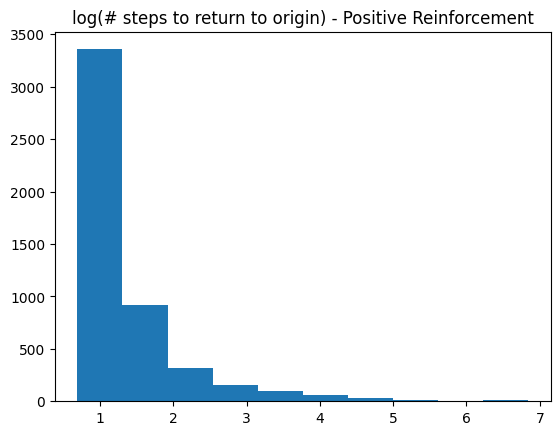

In [43]:
plt.hist(np.log(first_match_indices_nona))
plt.title("log(# steps to return to origin) - Positive Reinforcement")

In [32]:
first_match_indices.count()

np.int64(4957)

In [ ]:
# Optional: inline plotting (VSCode usually handles this automatically)
%matplotlib inline

# Load your DataFrame (replace this with your actual load line)
# df = pd.read_csv('your_data.csv')

# For demo/testing (remove this if you already have df):
# df = pd.DataFrame({f'X_{i}': np.random.normal(loc=i%5, scale=2, size=1000) for i in range(995)})

# Create the slider widget
column_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=994,
    step=1,
    description='X_i',
    continuous_update=False
)

# Define the update function
def update_histogram(i):
    plt.figure(figsize=(6, 4))
    column_name = f"X_{i}"
    data = whatsthis[column_name]

    plt.hist(data, bins=50, color='cornflowerblue', edgecolor='black')
    plt.title(f"Histogram of {column_name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Link the slider to the function
interactive_plot = widgets.interactive(update_histogram, i=column_slider)

# Display the slider and plot
display(column_slider, interactive_plot)

IntSlider(value=0, continuous_update=False, description='X_i', max=994)

interactive(children=(IntSlider(value=0, continuous_update=False, description='X_i', max=994), Output()), _dom…

In [22]:
np.random.choice(directions, p=probabilities).item()

1

In [25]:
generate_1d_walk_positive(100)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 10,
 11,
 12,
 13,
 14,
 15,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 55,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 67,
 68,
 69,
 70,
 71,
 72,
 71,
 72,
 73,
 74,
 75,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 79,
 80,
 81,
 82]

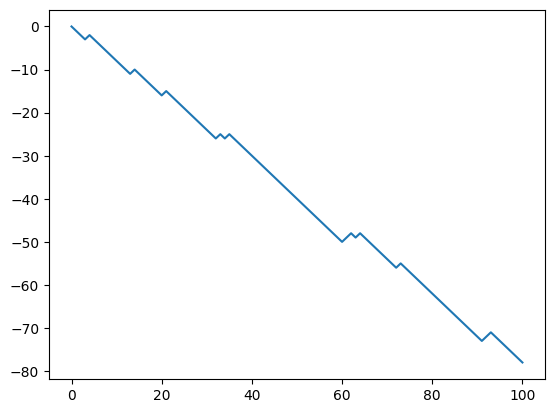

In [27]:
import matplotlib.pyplot as plt

walk = generate_1d_walk_positive(num_steps = 100)

x_values = list(range(101))
y_values = walk

plt.plot(x_values, y_values)

nice lmao, as expected, get strong pull in one direction

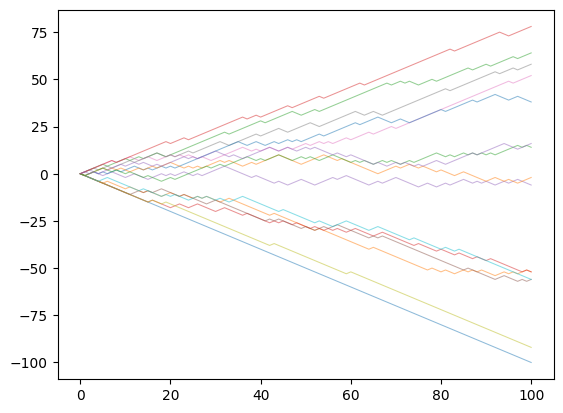

In [37]:
for i in range(15):
    walk = generate_1d_walk_positive(num_steps = 100)

    x_values = list(range(101))
    y_values = walk

    plt.plot(x_values, y_values, linewidth=0.75, alpha = 0.5)

In [17]:
def generate_1d_walk_negative(num_steps = 100_000):
    # initialize trajectory and reinforcement factor (transition probabilities)
    trajectory = [0]
    directions = np.array([-1, 1])
    l = 1
    r = 1
    total = 2
    probabilities = np.array([1/2, 1/2])
    curr = 0 

    for i in range(num_steps):
        step = np.random.choice(directions, p=probabilities).item()
        if step == -1:
            r += 1
        elif step == 1:
            l += 1
        total += 1

        # add step to trajectory
        curr += step
        trajectory.append(curr)

        # update probabilities
        probabilities[0] = l/total
        probabilities[1] = r/total
    

    return trajectory

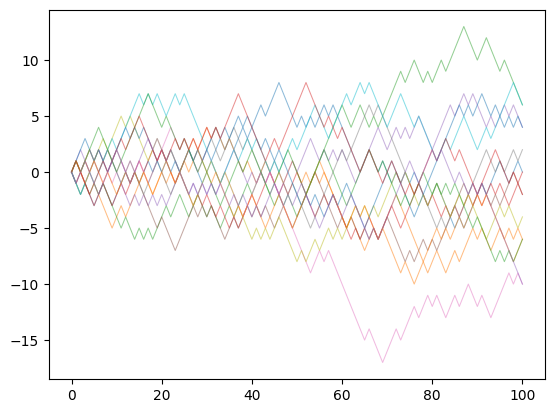

In [18]:
for i in range(15):
    walk = generate_1d_walk_negative(num_steps = 100)

    x_values = list(range(101))
    y_values = walk

    plt.plot(x_values, y_values, linewidth=0.75, alpha = 0.5)

In [19]:
def generate_negative_1d_walk(num_walks, num_steps):
    """
    num_walks is the number of rows
    num_steps + 1 is the number of columns
    """

    # Initialize empty numpy array
    data = np.empty((num_walks, num_steps + 1))

    for i in range(num_walks):
        data[i] = generate_1d_walk_negative(num_steps)

    # Convert to DataFrame
    columns = [f'X_{i}' for i in range(num_steps+1)]
    df = pd.DataFrame(data, columns=columns)

    return df

In [20]:
whatsthis2 = generate_negative_1d_walk(num_walks=10000,num_steps=1000)
whatsthis2

# Optional: inline plotting (VSCode usually handles this automatically)
%matplotlib inline

# Load your DataFrame (replace this with your actual load line)
# df = pd.read_csv('your_data.csv')

# For demo/testing (remove this if you already have df):
# df = pd.DataFrame({f'X_{i}': np.random.normal(loc=i%5, scale=2, size=1000) for i in range(995)})

# Create the slider widget
column_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=994,
    step=1,
    description='X_i',
    continuous_update=False
)

# Define the update function
def update_histogram(i):
    plt.figure(figsize=(6, 4))
    column_name = f"X_{i}"
    data = whatsthis2[column_name]

    plt.hist(data, bins=50, color='cornflowerblue', edgecolor='black')
    plt.title(f"Histogram of {column_name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Link the slider to the function
interactive_plot = widgets.interactive(update_histogram, i=column_slider)

# Display the slider and plot
display(column_slider, interactive_plot)

IntSlider(value=0, continuous_update=False, description='X_i', max=994)

interactive(children=(IntSlider(value=0, continuous_update=False, description='X_i', max=994), Output()), _dom…

In [33]:
def first_match_index(row):
    matches = row[1:][row[1:] == 0]
    return whatsthis2.columns.get_loc(matches.index[0]) if not matches.empty else None

first_match_indices_2 = whatsthis2.apply(first_match_index, axis=1)

In [34]:
first_match_indices_2.count()

np.int64(9999)

Text(0.5, 1.0, 'log(# steps to return to origin) - Negative Reinforcement')

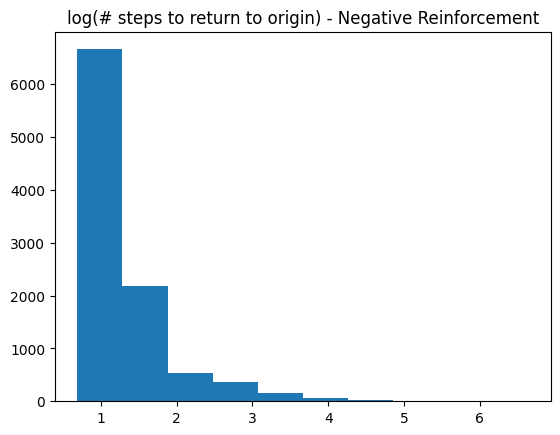

In [45]:
first_match_indices_2_nona = first_match_indices_2.dropna()
plt.hist(np.log(first_match_indices_2_nona))
plt.title("log(# steps to return to origin) - Negative Reinforcement")

In [ ]:
whatsthis3 = generate_negative_1d_walk(num_walks=30000,num_steps=1000)
whatsthis3

# Optional: inline plotting (VSCode usually handles this automatically)
%matplotlib inline

# Load your DataFrame (replace this with your actual load line)
# df = pd.read_csv('your_data.csv')

# For demo/testing (remove this if you already have df):
# df = pd.DataFrame({f'X_{i}': np.random.normal(loc=i%5, scale=2, size=1000) for i in range(995)})

# Create the slider widget
column_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=994,
    step=1,
    description='X_i',
    continuous_update=False
)

# Define the update function
def update_histogram(i):
    plt.figure(figsize=(6, 4))
    column_name = f"X_{i}"
    data = whatsthis3[column_name]

    plt.hist(data, bins=100, color='cornflowerblue', edgecolor='black')
    plt.title(f"Histogram of {column_name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Link the slider to the function
interactive_plot = widgets.interactive(update_histogram, i=column_slider)

# Display the slider and plot
display(column_slider, interactive_plot)

IntSlider(value=0, continuous_update=False, description='X_i', max=994)

interactive(children=(IntSlider(value=0, continuous_update=False, description='X_i', max=994), Output()), _dom…

In [22]:
# Create the slider widget
column_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=994,
    step=1,
    description='X_i',
    continuous_update=False
)

# Define the update function
def update_histogram(i):
    plt.figure(figsize=(6, 4))
    column_name = f"X_{i}"
    data = whatsthis3[column_name]

    plt.hist(data, bins=100, color='cornflowerblue', edgecolor='black')
    plt.title(f"Histogram of {column_name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Link the slider to the function
interactive_plot = widgets.interactive(update_histogram, i=column_slider)

# Display the slider and plot
display(column_slider, interactive_plot)

IntSlider(value=0, continuous_update=False, description='X_i', max=994)

interactive(children=(IntSlider(value=0, continuous_update=False, description='X_i', max=994), Output()), _dom…

In [23]:
def generate_1d_walk_normal(num_steps = 100_000):
    # initialize trajectory and reinforcement factor (transition probabilities)
    trajectory = [0]
    directions = np.array([-1, 1])
    probabilities = np.array([1/2, 1/2])
    curr = 0 

    for i in range(num_steps):
        step = np.random.choice(directions, p=probabilities).item()

        curr += step
        trajectory.append(curr)

    return trajectory

In [25]:
def generate_normal_1d_walk(num_walks, num_steps):
    """
    num_walks is the number of rows
    num_steps + 1 is the number of columns
    """

    # Initialize empty numpy array
    data = np.empty((num_walks, num_steps + 1))

    for i in range(num_walks):
        data[i] = generate_1d_walk_normal(num_steps)

    # Convert to DataFrame
    columns = [f'X_{i}' for i in range(num_steps+1)]
    df = pd.DataFrame(data, columns=columns)

    return df

In [26]:
whatsthis4 = generate_normal_1d_walk(num_walks=30000,num_steps=1000)
whatsthis4

# Optional: inline plotting (VSCode usually handles this automatically)
%matplotlib inline

# Load your DataFrame (replace this with your actual load line)
# df = pd.read_csv('your_data.csv')

# For demo/testing (remove this if you already have df):
# df = pd.DataFrame({f'X_{i}': np.random.normal(loc=i%5, scale=2, size=1000) for i in range(995)})

# Create the slider widget
column_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=994,
    step=1,
    description='X_i',
    continuous_update=False
)

# Define the update function
def update_histogram(i):
    plt.figure(figsize=(6, 4))
    column_name = f"X_{i}"
    data = whatsthis4[column_name]

    plt.hist(data, bins=100, color='cornflowerblue', edgecolor='black')
    plt.title(f"Histogram of {column_name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Link the slider to the function
interactive_plot = widgets.interactive(update_histogram, i=column_slider)

# Display the slider and plot
display(column_slider, interactive_plot)

IntSlider(value=0, continuous_update=False, description='X_i', max=994)

interactive(children=(IntSlider(value=0, continuous_update=False, description='X_i', max=994), Output()), _dom…

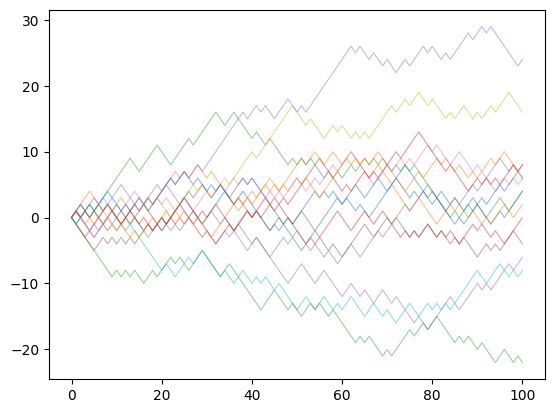

In [40]:
for i in range(15):
    walk = generate_1d_walk_normal(num_steps = 100)

    x_values = list(range(101))
    y_values = walk

    plt.plot(x_values, y_values, linewidth=0.75, alpha = 0.5)

Text(0.5, 1.0, 'log(# steps to return to origin) - Normal')

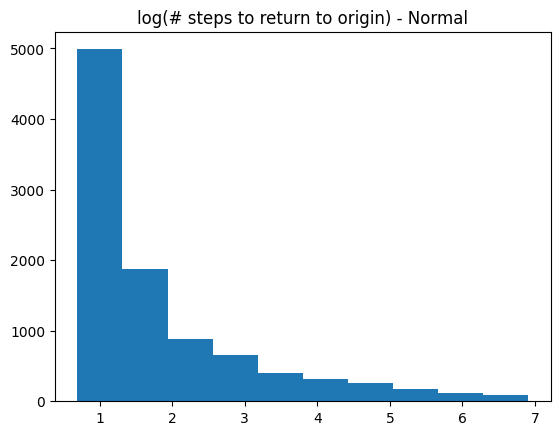

In [48]:
whatsthis5 = generate_normal_1d_walk(num_walks=10000,num_steps=1000)
whatsthis5

def first_match_index(row):
    matches = row[1:][row[1:] == 0]
    return whatsthis5.columns.get_loc(matches.index[0]) if not matches.empty else None

first_match_indices_5 = whatsthis5.apply(first_match_index, axis=1)

first_match_indices_5_nona = first_match_indices_5.dropna()
plt.hist(np.log(first_match_indices_5_nona))
plt.title("log(# steps to return to origin) - Normal")

In [158]:
first_match_indices_5

0         2.0
1         2.0
2         2.0
3        12.0
4         2.0
        ...  
9995      2.0
9996    546.0
9997      2.0
9998      2.0
9999     66.0
Length: 10000, dtype: float64

In [50]:
first_match_indices_5.count()

np.int64(9751)

In [60]:
max_val = max(first_match_indices_5)

result_normal = [sum(1 for x in first_match_indices_5 if x < i)/10000 for i in range(int(max_val) + 1)]
result_normal

[0.0,
 0.0,
 0.0,
 0.4987,
 0.4987,
 0.6267,
 0.6267,
 0.6854,
 0.6854,
 0.7238,
 0.7238,
 0.7504,
 0.7504,
 0.7734,
 0.7734,
 0.7898,
 0.7898,
 0.8035,
 0.8035,
 0.8143,
 0.8143,
 0.8229,
 0.8229,
 0.8298,
 0.8298,
 0.8383,
 0.8383,
 0.8442,
 0.8442,
 0.8496,
 0.8496,
 0.8544,
 0.8544,
 0.8583,
 0.8583,
 0.8614,
 0.8614,
 0.8662,
 0.8662,
 0.8697,
 0.8697,
 0.8725,
 0.8725,
 0.8755,
 0.8755,
 0.8789,
 0.8789,
 0.8813,
 0.8813,
 0.8849,
 0.8849,
 0.8868,
 0.8868,
 0.8895,
 0.8895,
 0.8914,
 0.8914,
 0.8932,
 0.8932,
 0.896,
 0.896,
 0.897,
 0.897,
 0.8986,
 0.8986,
 0.8999,
 0.8999,
 0.9018,
 0.9018,
 0.9028,
 0.9028,
 0.9039,
 0.9039,
 0.9048,
 0.9048,
 0.9061,
 0.9061,
 0.9079,
 0.9079,
 0.9088,
 0.9088,
 0.9098,
 0.9098,
 0.9104,
 0.9104,
 0.9115,
 0.9115,
 0.9125,
 0.9125,
 0.9137,
 0.9137,
 0.9146,
 0.9146,
 0.9155,
 0.9155,
 0.9167,
 0.9167,
 0.9176,
 0.9176,
 0.9182,
 0.9182,
 0.9191,
 0.9191,
 0.9198,
 0.9198,
 0.9204,
 0.9204,
 0.9213,
 0.9213,
 0.9222,
 0.9222,
 0.923,
 0.923

In [61]:
max_val = max(first_match_indices_nona)

result_positive = [sum(1 for x in first_match_indices_nona if x < i)/10000 for i in range(int(max_val) + 1)]

max_val = max(first_match_indices_2)

result_negative = [sum(1 for x in first_match_indices_2 if x < i)/10000 for i in range(int(max_val) + 1)]

Text(0.5, 1.0, 'Proportion of walks returned to origin within T steps')

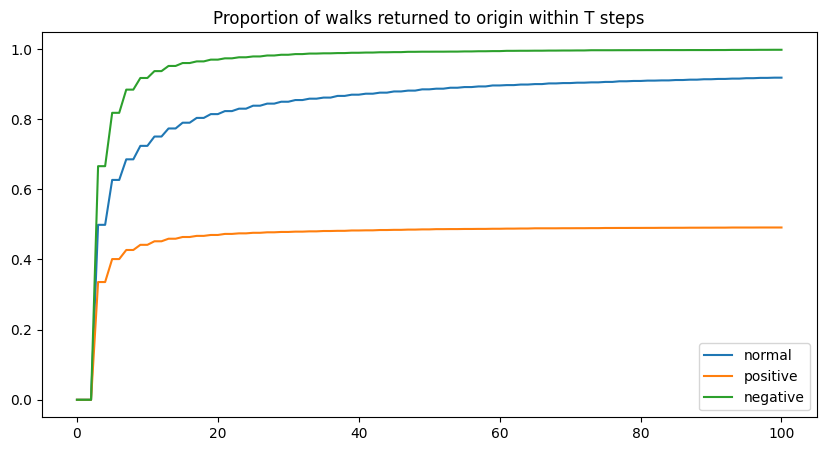

In [65]:
plt.figure(figsize=(10,5))
plt.plot(result_normal[:101], label="normal")
plt.plot(result_positive[:101], label="positive")
plt.plot(result_negative[:101], label="negative")
plt.legend()
plt.title("Proportion of walks returned to origin within T steps")

## 2d case

In [74]:
from randomwalk_functions import *

In [124]:
def generate_2d_walk(num_steps = 1_000):

    """
    Generates a 2D symmetric random walk.
    Input: num_steps
    Output: trajectory (as a 1D array of coordinates)
    """

    # Initialize trajectory
    trajectory = [np.array([0,0])] * (num_steps+1)
    directions = np.array([[0,-1], [0,1], [1,0], [-1,0]])
    probabilities = np.array([1/4, 1/4, 1/4, 1/4])
    curr = np.array([0,0])

    for i in range(1, num_steps+1):
        index = np.random.choice(range(4), p=probabilities)
        step = directions[index]

        # Add step to trajectory
        curr = curr + step
        trajectory[i] = curr

    return trajectory

In [125]:
twod_test = generate_2d_walk()

In [126]:
twod_test

[array([0, 0]),
 array([1, 0]),
 array([0, 0]),
 array([0, 1]),
 array([1, 1]),
 array([0, 1]),
 array([1, 1]),
 array([1, 0]),
 array([ 1, -1]),
 array([ 2, -1]),
 array([ 2, -2]),
 array([ 3, -2]),
 array([ 4, -2]),
 array([ 4, -1]),
 array([ 3, -1]),
 array([ 2, -1]),
 array([ 1, -1]),
 array([ 0, -1]),
 array([ 0, -2]),
 array([ 1, -2]),
 array([ 0, -2]),
 array([ 1, -2]),
 array([ 2, -2]),
 array([ 3, -2]),
 array([ 3, -1]),
 array([ 4, -1]),
 array([ 4, -2]),
 array([ 4, -3]),
 array([ 4, -2]),
 array([ 4, -1]),
 array([ 5, -1]),
 array([ 4, -1]),
 array([4, 0]),
 array([3, 0]),
 array([3, 1]),
 array([3, 0]),
 array([ 3, -1]),
 array([ 3, -2]),
 array([ 4, -2]),
 array([ 4, -1]),
 array([4, 0]),
 array([3, 0]),
 array([2, 0]),
 array([3, 0]),
 array([2, 0]),
 array([3, 0]),
 array([3, 1]),
 array([4, 1]),
 array([3, 1]),
 array([2, 1]),
 array([2, 0]),
 array([2, 1]),
 array([3, 1]),
 array([2, 1]),
 array([2, 0]),
 array([2, 1]),
 array([2, 2]),
 array([1, 2]),
 array([0, 2]),


#### failed attempt at animation

In [104]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
from PIL import Image as PILImage

In [99]:
print(type(twod_test))  # should be list
print(len(twod_test))   # should be > 1
print(twod_test[0])     # should be something like [x0, y0]

<class 'list'>
1001
[0 0]


IndexError: list index out of range

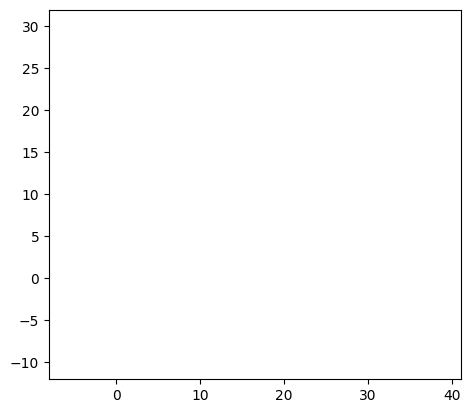

In [106]:
trajectory = np.stack(twod_test)

# Step 2: Setup the figure
fig, ax = plt.subplots()
ax.set_xlim(trajectory[:, 0].min() - 1, trajectory[:, 0].max() + 1)
ax.set_ylim(trajectory[:, 1].min() - 1, trajectory[:, 1].max() + 1)
ax.set_aspect('equal')

line, = ax.plot([], [], lw=2, color='blue')
point, = ax.plot([], [], 'ro')

# Step 3: Animation functions
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def update(frame):
    x = trajectory[:frame + 1, 0]
    y = trajectory[:frame + 1, 1]
    line.set_data(x, y)
    point.set_data(x[-1], y[-1])
    return line, point

# Step 4: Create animation (blit=False works better in some environments)
ani = animation.FuncAnimation(
    fig, update,
    frames=len(trajectory),
    init_func=init,
    blit=False,
    interval=200
)

# Step 5: Save the animation using PillowWriter
ani.save("random_walk.gif", writer=PillowWriter(fps=5))

# Step 6: Display animation inside the notebook
Image("random_walk.gif")

#### back to normal shenanigans and trying to plot stuff for 2d

In [109]:
import seaborn as sns

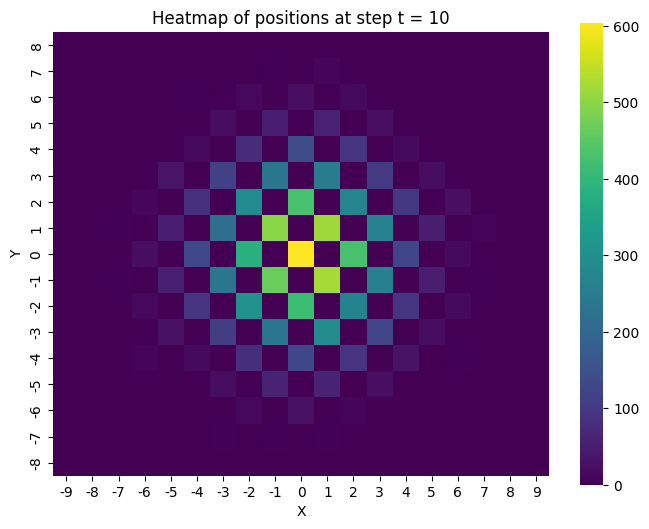

In [136]:
# get a bunch of trajectories and plot heatmaps

# Suppose you have a list of many trajectories
# Each trajectory is a list of 2D points (np.array of shape (2,))
# Example: list of 100 random walks of 20 steps
num_trajectories = 10000
steps = 100

# Generate your data
trajectories = [generate_2d_walk(steps) for _ in range(num_trajectories)]

# Choose time step t
t = 10  # e.g. step 10

# Get all positions at time step t
positions_t = [tuple(traj[t]) for traj in trajectories]

# Count frequency of each position
count = Counter(positions_t)

# Convert to x, y and values
xs, ys = zip(*count.keys())
values = list(count.values())

# Create a 2D grid based on min/max of x and y
x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)

grid_width = x_max - x_min + 1
grid_height = y_max - y_min + 1

heatmap = np.zeros((grid_height, grid_width))

# Fill heatmap values
for (x, y), val in count.items():
    heatmap[y_max - y, x - x_min] = val  # invert y for plotting correctly

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, cmap='viridis', cbar=True, square=True)
plt.title(f"Heatmap of positions at step t = {t}")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(np.arange(grid_width) + 0.5, range(x_min, x_max + 1))
plt.yticks(np.arange(grid_height) + 0.5, range(y_max, y_min - 1, -1))
plt.show()

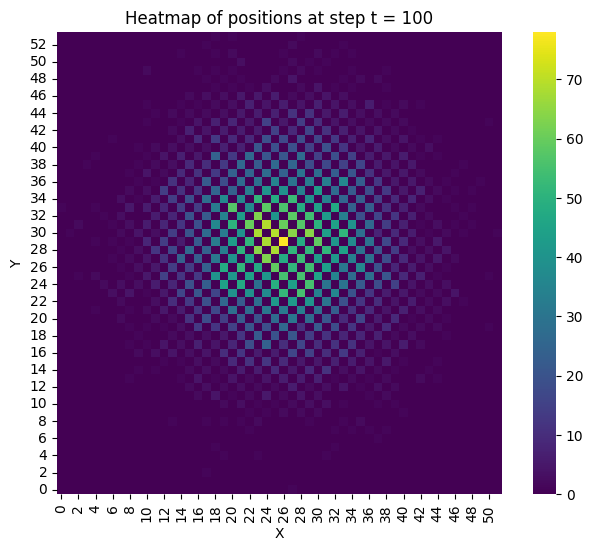

In [137]:
# Choose time step t
t = 100  # e.g. step 10

# Get all positions at time step t
positions_t = [tuple(traj[t]) for traj in trajectories]

# Count frequency of each position
count = Counter(positions_t)

# Convert to x, y and values
xs, ys = zip(*count.keys())
values = list(count.values())

# Create a 2D grid based on min/max of x and y
x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)

grid_width = x_max - x_min + 1
grid_height = y_max - y_min + 1

heatmap = np.zeros((grid_height, grid_width))

# Fill heatmap values
for (x, y), val in count.items():
    heatmap[y_max - y, x - x_min] = val  # invert y for plotting correctly

# Plot using seaborn
ax.cla()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, cmap='viridis', cbar=True, square=True)
plt.title(f"Heatmap of positions at step t = {t}")
plt.xlabel("X")
plt.ylabel("Y")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

In [129]:
def generate_2d_walk_positive(num_steps = 1_000):

    """
    Generates a 2D positive random walk.
    Input: num_steps
    Output: trajectory (as a 1D array of coordinates)
    """

    # Initialize trajectory
    trajectory = [np.array([0,0])] * (num_steps+1)
    directions = np.array([[0,-1], [0,1], [1,0], [-1,0]])
    probabilities = np.array([1/4, 1/4, 1/4, 1/4])
    curr = np.array([0,0])
    
    left = 1
    right = 1
    down = 1
    up = 1
    total = 4

    for i in range(1, num_steps+1):
        index = np.random.choice(range(4), p=probabilities)
        step = directions[index]

        # Add step to trajectory
        curr = curr + step
        trajectory[i] = curr

        # update the probabilities
        if index == 0:
            down += 1
        elif index == 1:
            up += 1
        elif index == 2:
            right += 1
        else:
            left += 1
        total += 1

        # update probabilities
        probabilities[0] = down/total
        probabilities[1] = up/total
        probabilities[2]=right/total
        probabilities[3]=left/total


    return trajectory


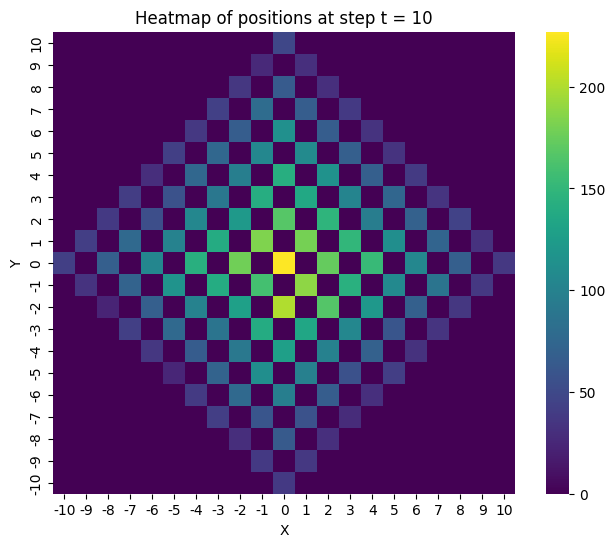

In [130]:
# get a bunch of trajectories and plot heatmaps

# Suppose you have a list of many trajectories
# Each trajectory is a list of 2D points (np.array of shape (2,))
# Example: list of 100 random walks of 20 steps
num_trajectories = 10000
steps = 100

# Generate your data
trajectories = [generate_2d_walk_positive(steps) for _ in range(num_trajectories)]

# Choose time step t
t = 10  # e.g. step 10

# Get all positions at time step t
positions_t = [tuple(traj[t]) for traj in trajectories]

# Count frequency of each position
count = Counter(positions_t)

# Convert to x, y and values
xs, ys = zip(*count.keys())
values = list(count.values())

# Create a 2D grid based on min/max of x and y
x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)

grid_width = x_max - x_min + 1
grid_height = y_max - y_min + 1

heatmap = np.zeros((grid_height, grid_width))

# Fill heatmap values
for (x, y), val in count.items():
    heatmap[y_max - y, x - x_min] = val  # invert y for plotting correctly

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, cmap='viridis', cbar=True, square=True)
plt.title(f"Heatmap of positions at step t = {t}")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(np.arange(grid_width) + 0.5, range(x_min, x_max + 1))
plt.yticks(np.arange(grid_height) + 0.5, range(y_max, y_min - 1, -1))
plt.show()

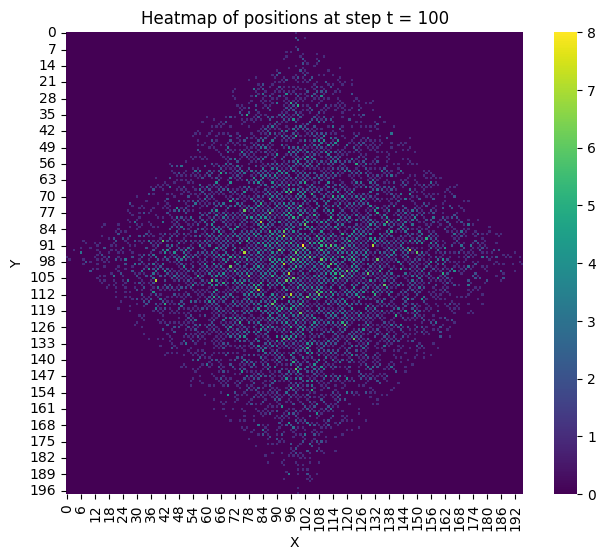

In [ ]:
# Choose time step t
t = 100  # e.g. step 10

# Get all positions at time step t
positions_t = [tuple(traj[t]) for traj in trajectories]

# Count frequency of each position
count = Counter(positions_t)

# Convert to x, y and values
xs, ys = zip(*count.keys())
values = list(count.values())

# Create a 2D grid based on min/max of x and y
x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)

grid_width = x_max - x_min + 1
grid_height = y_max - y_min + 1

heatmap = np.zeros((grid_height, grid_width))

# Fill heatmap values
for (x, y), val in count.items():
    heatmap[y_max - y, x - x_min] = val  # invert y for plotting correctly

# Plot using seaborn
plt.cla()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, cmap='viridis', cbar=True, square=True)
plt.title(f"Heatmap of positions at step t = {t}")
plt.xlabel("X")
plt.ylabel("Y")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

In [138]:
def generate_2d_walk_negative(num_steps = 1_000):

    """
    Generates a 2D negative random walk.
    Input: num_steps
    Output: trajectory (as a 1D array of coordinates)
    """

    # Initialize trajectory
    trajectory = [np.array([0,0])] * (num_steps+1)
    directions = np.array([[0,-1], [0,1], [1,0], [-1,0]])
    probabilities = np.array([1/4, 1/4, 1/4, 1/4])
    curr = np.array([0,0])
    
    left = 1
    right = 1
    down = 1
    up = 1
    total = 4

    for i in range(1, num_steps+1):
        index = np.random.choice(range(4), p=probabilities)
        step = directions[index]

        # Add step to trajectory
        curr = curr + step
        trajectory[i] = curr

        # update the probabilities
        if index == 0:
            up += 1/3
            right += 1/3
            left += 1/3
        elif index == 1:
            down += 1/3
            right += 1/3
            left += 1/3
        elif index == 2:
            down += 1/3
            up += 1/3
            left += 1/3
        else:
            down += 1/3
            up += 1/3
            right += 1/3
        total += 1

        # update probabilities
        probabilities[0] = down/total
        probabilities[1] = up/total
        probabilities[2]=right/total
        probabilities[3]=left/total


    return trajectory

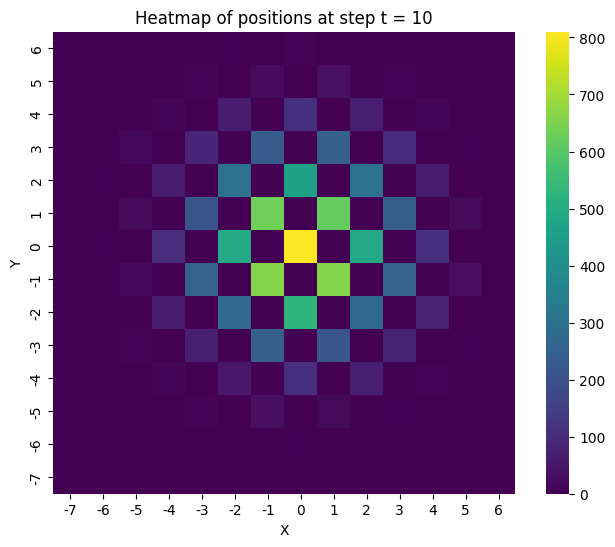

In [139]:
# get a bunch of trajectories and plot heatmaps

# Suppose you have a list of many trajectories
# Each trajectory is a list of 2D points (np.array of shape (2,))
# Example: list of 100 random walks of 20 steps
num_trajectories = 10000
steps = 100

# Generate your data
trajectories = [generate_2d_walk_negative(steps) for _ in range(num_trajectories)]

# Choose time step t
t = 10  # e.g. step 10

# Get all positions at time step t
positions_t = [tuple(traj[t]) for traj in trajectories]

# Count frequency of each position
count = Counter(positions_t)

# Convert to x, y and values
xs, ys = zip(*count.keys())
values = list(count.values())

# Create a 2D grid based on min/max of x and y
x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)

grid_width = x_max - x_min + 1
grid_height = y_max - y_min + 1

heatmap = np.zeros((grid_height, grid_width))

# Fill heatmap values
for (x, y), val in count.items():
    heatmap[y_max - y, x - x_min] = val  # invert y for plotting correctly

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, cmap='viridis', cbar=True, square=True)
plt.title(f"Heatmap of positions at step t = {t}")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(np.arange(grid_width) + 0.5, range(x_min, x_max + 1))
plt.yticks(np.arange(grid_height) + 0.5, range(y_max, y_min - 1, -1))
plt.show()

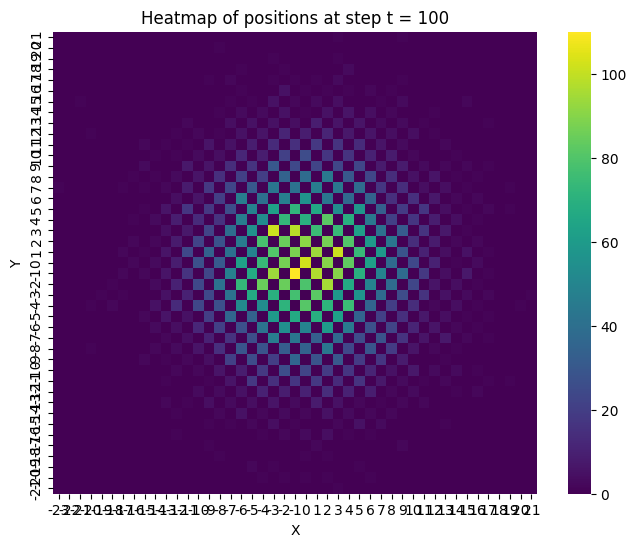

In [ ]:
# Choose time step t
t = 100  # e.g. step 10

# Get all positions at time step t
positions_t = [tuple(traj[t]) for traj in trajectories]

# Count frequency of each position
count = Counter(positions_t)

# Convert to x, y and values
xs, ys = zip(*count.keys())
values = list(count.values())

# Create a 2D grid based on min/max of x and y
x_min, x_max = min(xs), max(xs)
y_min, y_max = min(ys), max(ys)

grid_width = x_max - x_min + 1
grid_height = y_max - y_min + 1

heatmap = np.zeros((grid_height, grid_width))

# Fill heatmap values
for (x, y), val in count.items():
    heatmap[y_max - y, x - x_min] = val  # invert y for plotting correctly

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, cmap='viridis', cbar=True, square=True)
plt.title(f"Heatmap of positions at step t = {t}")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(np.arange(grid_width) + 0.5, range(x_min, x_max + 1))
plt.yticks(np.arange(grid_height) + 0.5, range(y_max, y_min - 1, -1))
plt.show()

#### yippee time to calculate the return probability

In [2]:
from randomwalk_functions import *

In [ ]:
num_trajectories = 10000
steps = 1000

# Generate your data
trajectories_normal = [generate_2d_walk(steps) for _ in range(num_trajectories)]
df = pd.DataFrame(trajectories_normal)


def first_match_index(row):
    for i, point in enumerate(row[1:], start=1):  # start=1 to offset skipping the first
        if np.array_equal(point, [0, 0]):
            return int(i)
    return None


first_match_indices_2d_normal = df.apply(first_match_index, axis=1)

first_match_indices_2d_normal

0         NaN
1         2.0
2         6.0
3         NaN
4       212.0
        ...  
9995    134.0
9996      4.0
9997     70.0
9998      2.0
9999      4.0
Length: 10000, dtype: float64

In [148]:
first_match_indices_2d_normal.count()

np.int64(6844)

Text(0.5, 1.0, 'log(# steps to return to origin) - 2D Normal')

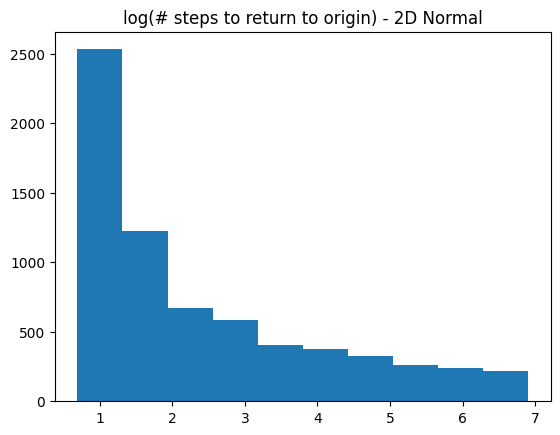

In [150]:
plt.hist(np.log(first_match_indices_2d_normal))
plt.title("log(# steps to return to origin) - 2D Normal")

In [151]:
num_trajectories = 10000
steps = 1000

# Generate your data
trajectories_positive = [generate_2d_walk_positive(steps) for _ in range(num_trajectories)]
df = pd.DataFrame(trajectories_positive)


def first_match_index(row):
    for i, point in enumerate(row[1:], start=1):  # start=1 to offset skipping the first
        if np.array_equal(point, [0, 0]):
            return int(i)
    return None


first_match_indices_2d_positive = df.apply(first_match_index, axis=1)

first_match_indices_2d_positive

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9995    2.0
9996    NaN
9997    NaN
9998    NaN
9999    2.0
Length: 10000, dtype: float64

In [152]:
first_match_indices_2d_positive.count()

np.int64(2928)

Text(0.5, 1.0, 'log(# steps to return to origin) - 2D Positive')

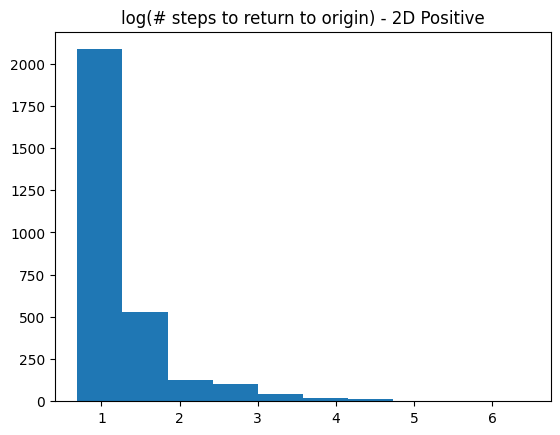

In [153]:
plt.hist(np.log(first_match_indices_2d_positive))
plt.title("log(# steps to return to origin) - 2D Positive")

In [154]:
num_trajectories = 10000
steps = 1000

# Generate your data
trajectories_negative = [generate_2d_walk_negative(steps) for _ in range(num_trajectories)]
df = pd.DataFrame(trajectories_negative)


def first_match_index(row):
    for i, point in enumerate(row[1:], start=1):  # start=1 to offset skipping the first
        if np.array_equal(point, [0, 0]):
            return int(i)
    return None


first_match_indices_2d_negative = df.apply(first_match_index, axis=1)

first_match_indices_2d_negative

0       16.0
1        2.0
2       12.0
3        NaN
4        NaN
        ... 
9995    22.0
9996     4.0
9997     4.0
9998     NaN
9999    96.0
Length: 10000, dtype: float64

In [155]:
first_match_indices_2d_negative.count()

np.int64(8060)

Text(0.5, 1.0, 'log(# steps to return to origin) - 2D Negative')

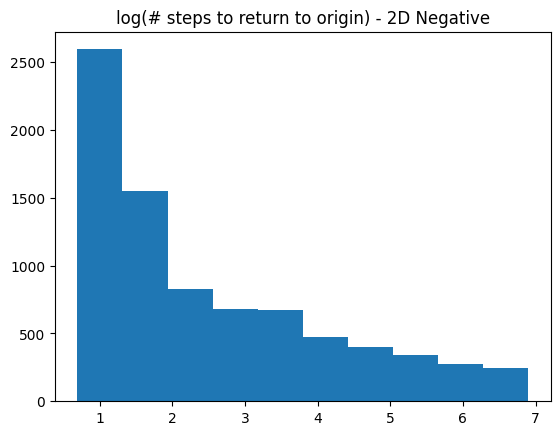

In [156]:
plt.hist(np.log(first_match_indices_2d_negative))
plt.title("log(# steps to return to origin) - 2D Negative")

In [160]:
first_match_indices_2d_normal.dropna()

1         2.0
2         6.0
4       212.0
5        50.0
7        66.0
        ...  
9995    134.0
9996      4.0
9997     70.0
9998      2.0
9999      4.0
Length: 6844, dtype: float64

In [161]:
max_val = max(first_match_indices_2d_normal.dropna())

result_normal = [sum(1 for x in first_match_indices_2d_normal.dropna() if x < i)/10000 for i in range(int(max_val) + 1)]

max_val = max(first_match_indices_2d_positive.dropna())

result_positive = [sum(1 for x in first_match_indices_2d_positive.dropna() if x < i)/10000 for i in range(int(max_val) + 1)]

max_val = max(first_match_indices_2d_negative.dropna())

result_negative = [sum(1 for x in first_match_indices_2d_negative.dropna() if x < i)/10000 for i in range(int(max_val) + 1)]

Text(0.5, 1.0, 'Proportion of walks returned to origin within T steps')

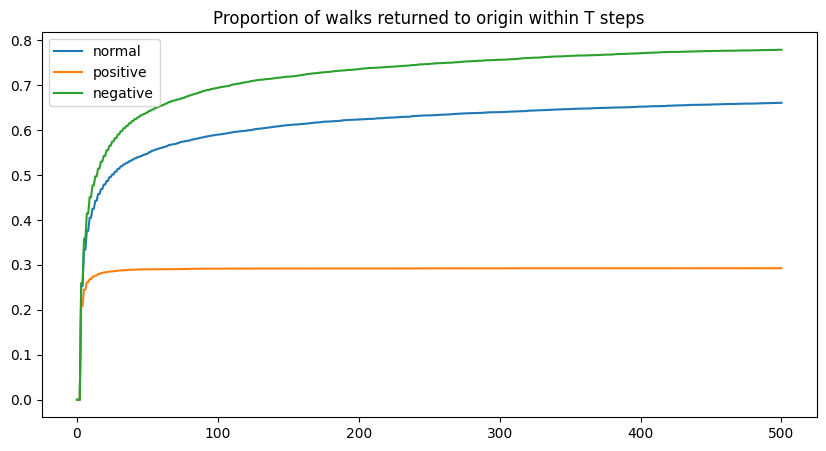

In [165]:
plt.figure(figsize=(10,5))
plt.plot(result_normal[:501], label="normal")
plt.plot(result_positive[:501], label="positive")
plt.plot(result_negative[:501], label="negative")
plt.legend()
plt.title("Proportion of walks returned to origin within T steps")

C:\Users\liang\AppData\Local\Temp\ipykernel_28236\982942203.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero_count, bins=20)


Text(0, 0.5, 'Count')

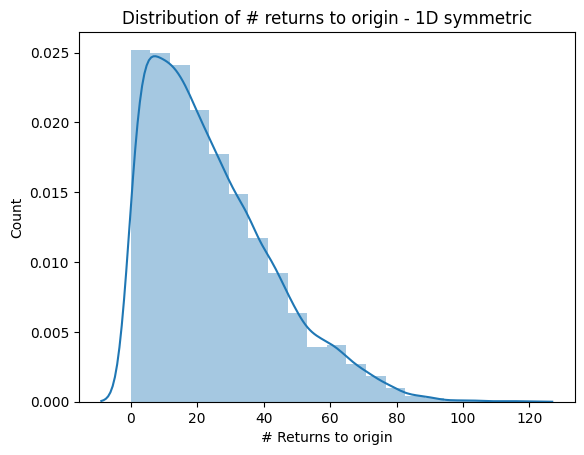

In [187]:
# Generate your data - whatsthis5 = normal case, 10k steps
zero_count = (whatsthis5.iloc[:, 1:] == 0).sum(axis=1)
sns.distplot(zero_count, bins=20)
plt.title("Distribution of # returns to origin - 1D symmetric")
plt.xlabel("# Returns to origin")
plt.ylabel("Count")

In [171]:
zero_count

0       45
1       31
2       23
3       34
4        6
        ..
9995    25
9996     8
9997    26
9998    49
9999    28
Length: 10000, dtype: int64

C:\Users\liang\AppData\Local\Temp\ipykernel_28236\1148829503.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero_count_pos)


Text(0, 0.5, 'Count')

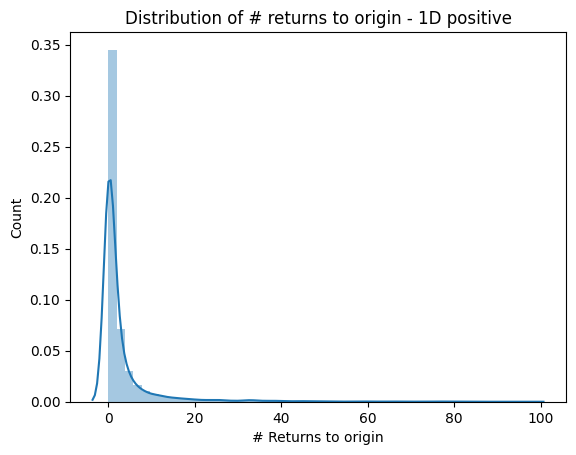

In [184]:
# dist # returns to origin, whatsthis = 1d positive reinforcement, 10k runs
zero_count_pos = (whatsthis.iloc[:, 1:] == 0).sum(axis=1)
sns.distplot(zero_count_pos)
plt.title("Distribution of # returns to origin - 1D positive")
plt.xlabel("# Returns to origin")
plt.ylabel("Count")

C:\Users\liang\AppData\Local\Temp\ipykernel_28236\1424934451.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero_count_neg, bins=20)


Text(0, 0.5, 'Count')

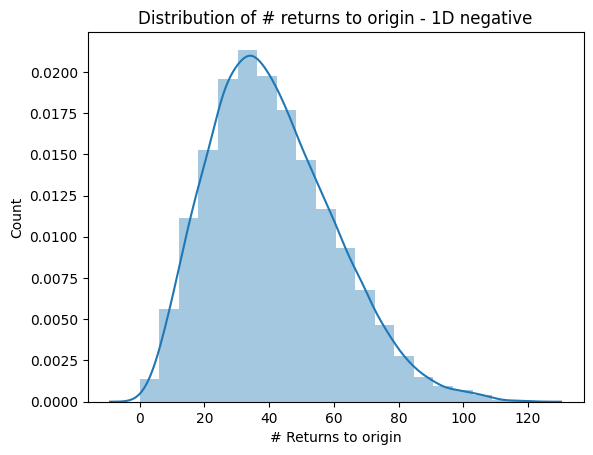

In [188]:
zero_count_neg = (whatsthis2.iloc[:, 1:] == 0).sum(axis=1)
sns.distplot(zero_count_neg, bins=20)
plt.title("Distribution of # returns to origin - 1D negative")
plt.xlabel("# Returns to origin")
plt.ylabel("Count")

number of returns within 1000 steps, 2d case

In [ ]:
# Generate your data - negative 2d
trajectories_negative = [generate_2d_walk_negative(steps) for _ in range(num_trajectories)]
df_neg = pd.DataFrame(trajectories_negative)

In [190]:
df_neg

0        1         2        3        4        5        6         7     \
0     [0, 0]   [1, 0]    [0, 0]   [0, 1]   [1, 1]   [1, 0]  [1, -1]   [0, -1]   
1     [0, 0]   [1, 0]    [0, 0]   [0, 1]  [-1, 1]  [-1, 2]   [0, 2]   [-1, 2]   
2     [0, 0]   [1, 0]   [1, -1]   [1, 0]   [2, 0]   [1, 0]  [1, -1]    [1, 0]   
3     [0, 0]   [1, 0]   [1, -1]  [2, -1]  [3, -1]  [2, -1]  [1, -1]   [2, -1]   
4     [0, 0]   [1, 0]    [2, 0]   [1, 0]   [0, 0]  [-1, 0]  [-1, 1]   [-1, 0]   
...      ...      ...       ...      ...      ...      ...      ...       ...   
9995  [0, 0]  [-1, 0]    [0, 0]   [1, 0]   [2, 0]   [2, 1]   [2, 0]    [2, 1]   
9996  [0, 0]   [0, 1]    [0, 2]   [0, 3]   [1, 3]   [0, 3]   [0, 4]   [-1, 4]   
9997  [0, 0]   [1, 0]    [1, 1]   [2, 1]   [2, 2]   [1, 2]   [1, 3]    [2, 3]   
9998  [0, 0]  [-1, 0]  [-1, -1]  [0, -1]  [0, -2]  [0, -3]  [0, -4]  [-1, -4]   
9999  [0, 0]   [1, 0]    [0, 0]   [1, 0]  [1, -1]  [0, -1]   [0, 0]   [0, -1]   

          8         9     ...        991         992        993        994   \
0      [0, -2]   [0, -1]  ...     [29, 6]     [29, 5]    [29, 4]    [29, 5]   
1      [-1, 3]   [-2, 3]  ...      [1, 8]      [1, 9]    [1, 10]     [1, 9]   
2       [0, 0]   [0, -1]  ...     [19, 8]     [19, 7]    [20, 7]    [20, 6]   
3      [2, -2]   [3, -2]  ...    [15, 10]     [15, 9]    [16, 9]    [16, 8]   
4     [-1, -1]  [-1, -2]  ...  [-10, -33]  [-10, -34]  [-9, -34]  [-8, -34]   
...        ...       ...  ...         ...         ...        ...        ...   
9995    [3, 1]    [3, 2]  ...   [-8, -19]   [-8, -20]  [-7, -20]  [-6, -20]   
9996   [-1, 3]   [-2, 3]  ...    [-4, 11]    [-3, 11]   [-3, 10]    [-3, 9]   
9997    [2, 2]    [3, 2]  ...   [15, -32]   [14, -32]  [14, -31]  [14, -32]   
9998  [-2, -4]  [-1, -4]  ...   [-19, -8]   [-19, -7]  [-20, -7]  [-20, -6]   
9999  [-1, -1]   [-1, 0]  ...   [-9, -22]   [-9, -21]  [-8, -21]  [-7, -21]   

           995        996        997         998         999         1000  
0       [28, 5]    [29, 5]    [28, 5]     [28, 6]     [29, 6]     [29, 7]  
1        [0, 9]    [-1, 9]    [-2, 9]     [-3, 9]     [-2, 9]     [-1, 9]  
2       [19, 6]    [19, 5]    [19, 6]     [19, 5]     [19, 6]     [20, 6]  
3       [16, 7]    [16, 6]    [16, 5]     [16, 4]     [16, 3]     [15, 3]  
4     [-9, -34]  [-9, -35]  [-9, -34]  [-10, -34]  [-10, -33]  [-10, -32]  
...         ...        ...        ...         ...         ...         ...  
9995  [-6, -19]  [-7, -19]  [-7, -18]   [-8, -18]   [-9, -18]  [-10, -18]  
9996    [-3, 8]    [-4, 8]    [-4, 9]     [-5, 9]    [-5, 10]    [-5, 11]  
9997  [14, -31]  [14, -30]  [15, -30]   [15, -29]   [15, -30]   [16, -30]  
9998  [-21, -6]  [-21, -7]  [-22, -7]   [-21, -7]   [-22, -7]   [-23, -7]  
9999  [-7, -20]  [-8, -20]  [-8, -21]   [-9, -21]   [-9, -22]  [-10, -22]  

[10000 rows x 1001 columns]

In [196]:
def count_zeros(row):
    return sum(np.array_equal(point, [0, 0]) for point in row)

zero_counts_neg2d = df_neg.iloc[:,1:].apply(count_zeros, axis=1)

Text(0, 0.5, 'Count')

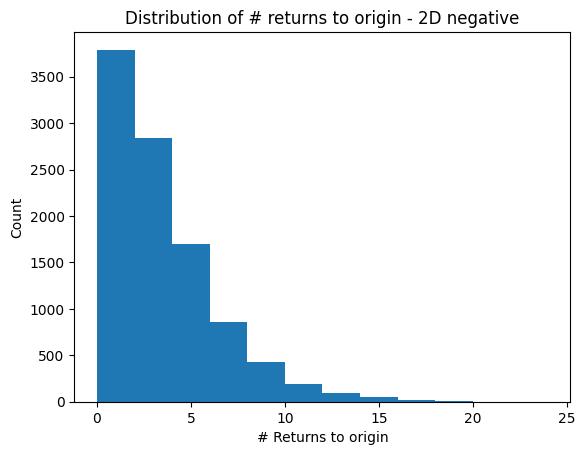

In [213]:
max_value = max(zero_counts_neg2d)

bins = np.arange(0, max_value+2, 2)
plt.hist(zero_counts_neg2d, bins=bins)
plt.title("Distribution of # returns to origin - 2D negative")
plt.xlabel("# Returns to origin")
plt.ylabel("Count")


In [ ]:
# Generate your data - positive 2d
trajectories_positive = [generate_2d_walk_positive(steps) for _ in range(num_trajectories)]
df_pos = pd.DataFrame(trajectories_positive)
zero_counts_pos2d = df_pos.iloc[:,1:].apply(count_zeros, axis=1)

Text(0, 0.5, 'Count')

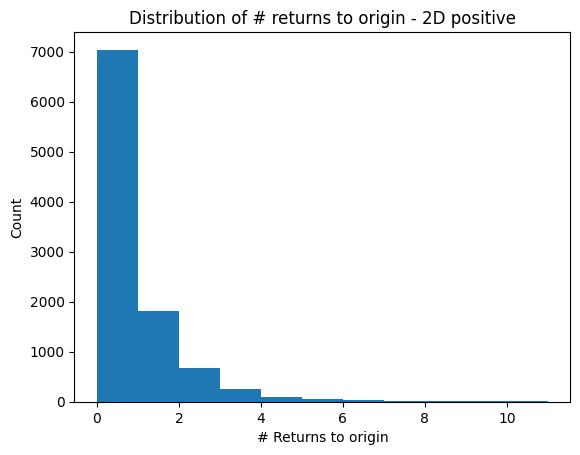

In [209]:
bins = np.arange(0, 11 + 1, 1)
plt.hist(zero_counts_pos2d, bins=bins)
plt.title("Distribution of # returns to origin - 2D positive")
plt.xlabel("# Returns to origin")
plt.ylabel("Count")

In [ ]:
# Generate your data - normal 2d
trajectories_normal = [generate_2d_walk(steps) for _ in range(num_trajectories)]
df_normal = pd.DataFrame(trajectories_normal)
zero_counts_normal2d = df_normal.iloc[:,1:].apply(count_zeros, axis=1)

Text(0, 0.5, 'Count')

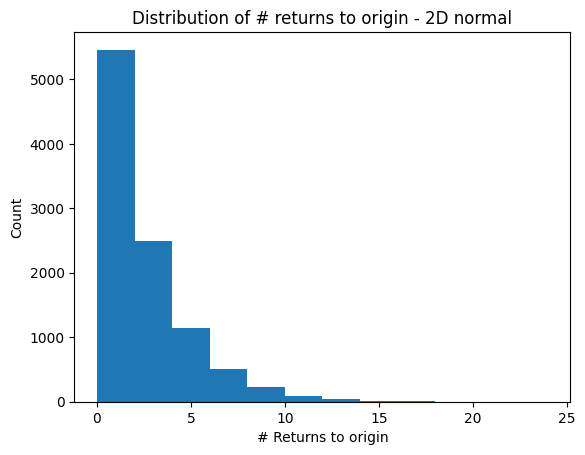

In [212]:
max_value = max(zero_counts_normal2d)

bins = np.arange(0, max_value+2, 2)
plt.hist(zero_counts_normal2d, bins=bins)
plt.title("Distribution of # returns to origin - 2D normal")
plt.xlabel("# Returns to origin")
plt.ylabel("Count")